# Posttest 4
## Nama : Alinda Azzahra
## NIM : 2009106092

### Import package yang digunakan

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Memanggil dataset yang digunakan

In [2]:
db = pd.read_csv('playstation_4_games.csv')
db.head(5)

,ID,GamePSID,GameName,Publisher,ReleaseYear,ReleaseDate,Developer,Genre,Features,Size,Medium,Hardware,CompletionTime(Hours),is_Digital_game,is_Physical_game,OfficialWebsite
0,1,3045,Q*Bert Rebooted,LOOT Interactive,2015.0,2015-02-17,Gonzo Games,Action,"PS Plus, PS Now",109.00,NaN,NaN,NaN,0,0,http://www.sidelineamusements.com/qbert/
1,2,3051,Q*Bert Rebooted (EU),LOOT Interactive,2015.0,2015-07-22,LOOT Interactive,Action,PS Now,127.00,Digital only,NaN,NaN,0,0,http://www.sidelineamusements.com/qbert/
2,3,6703,Q.U.B.E. 2,Trapped Nerve Games,2018.0,2018-03-13,Toxic Games,"Puzzle, Platformer",NaN,2682.88,Digital only,NaN,NaN,0,0,http://qube-game.com/
3,4,3403,Q.U.B.E. Director's Cut,GRIP Digital,2015.0,2015-07-21,Toxic Games,"Puzzle, Platformer",PS Plus,1945.60,Digital only,NaN,3-4,0,0,http://qube-game.com/
4,5,13176,Quake (PS4),Bethesda Softworks,2021.0,2021-08-19,"MachineGames, Nightdive Studios, id Software",First Person Shooter,NaN,NaN,Physical and Digital,NaN,NaN,0,0,https://bethesda.net/en/game/quake


### Melihat total dataset

In [3]:
db.shape

(9692, 16)

### Membagi dataset menjadi training set dan testing set

In [4]:
datadb_X = db[['GamePSID', 'GameName', 'Publisher', 'ReleaseYear', 'Genre', 'Size', 'Medium']]
labeldb_Y = db['Developer']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(datadb_X, labeldb_Y, test_size=.3)

In [8]:
print(f'Panjang data dari data train adalah {len(x_train)} baris',
      f'Panjang data dari label train adalah {len(y_train)} baris',
      f'Panjang data dari data test adalah {len(x_test)} baris',
      f'Panjang data dari label test adalah {len(y_test)} baris',
      f'Total panjang dari dataset adalah {len(db)} baris',
      sep='\n')

Panjang data dari data train adalah 6784 baris
Panjang data dari label train adalah 6784 baris
Panjang data dari data test adalah 2908 baris
Panjang data dari label test adalah 2908 baris
Total panjang dari dataset adalah 9692 baris


## Normalisasi

In [15]:
from sklearn.preprocessing import StandardScaler    
from sklearn.preprocessing import MinMaxScaler      
import matplotlib.pyplot as plt                     
import seaborn as sns                               

In [16]:
db_normalisasi = db.copy()

In [17]:
scaler = MinMaxScaler()

In [18]:
normal_db = scaler.fit_transform(db_normalisasi[['GamePSID', 'Size']])

In [19]:
normal_db = pd.DataFrame(normal_db)

In [14]:
normal_db.rename(columns={0:'GamePSID', 1:'Size'}, inplace=True)

## Sebelum di normalisasi

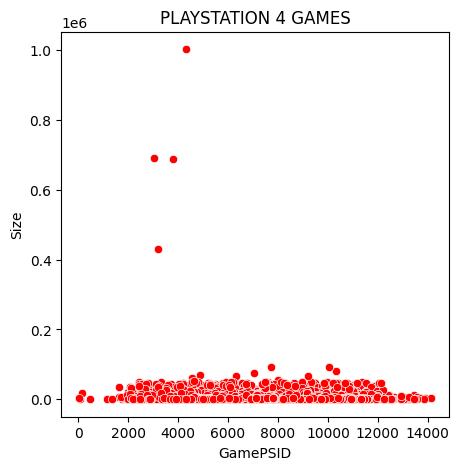

In [22]:
plt.figure(1, figsize=(5,5))
sns.scatterplot(db_normalisasi, x='GamePSID', y='Size', color='red')
plt.title('PLAYSTATION 4 GAMES')
plt.xlabel('GamePSID')
plt.ylabel('Size')
plt.show()

## Sesudah di normalisasi

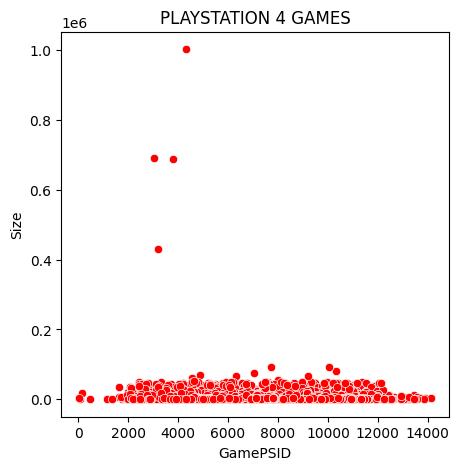

In [24]:
plt.figure(1, figsize=(5,5))
sns.scatterplot(db_normalisasi, x='GamePSID', y='Size', color='red')
plt.title('PLAYSTATION 4 GAMES')
plt.xlabel('GamePSID')
plt.ylabel('Size')
plt.show()

## Standarisasi

In [25]:
db_standarisasi = db.copy()

In [26]:
scaler = StandardScaler()

In [27]:
data_scaled = scaler.fit_transform(db[['GamePSID', 'ReleaseYear', 'Size']])

In [29]:
print("Dataset sebelum scalling: ")
print("Standar Deviasi : ", np.std(db))

Dataset sebelum scalling: 
Standar Deviasi :  ID                   2796.899552
GamePSID             4435.878813
ReleaseYear             2.013930
Size                18800.660468
is_Digital_game         0.000000
is_Physical_game        0.000000
dtype: float64


C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [28]:
print("Dataset setelah scalling: ")
print("Standar Deviasi : ", np.std(data_scaled))

Dataset setelah scalling: 
Standar Deviasi :  nan


In [30]:
hasil_standarisasi = pd.DataFrame(data_scaled)
hasil_standarisasi

,0,1,2
0,-0.992970,-1.745769,-0.271116
1,-0.991617,-1.745769,-0.270158
2,-0.168330,-0.256144,-0.134212
3,-0.912264,-1.745769,-0.173428
4,1.290907,1.233481,NaN
...,...,...,...
9687,0.784356,0.736940,-0.242181
9688,-0.075677,-0.256144,-0.161445
9689,-0.076579,-0.256144,-0.161445
9690,1.503266,1.233481,NaN


## Data Cleaning

### Nilai null

In [36]:
from sklearn.impute import SimpleImputer

In [24]:
print(db.isna().sum())

ID                          0
GamePSID                    0
GameName                    0
Publisher                 722
ReleaseYear               734
ReleaseDate               734
Developer                 699
Genre                     788
Features                 7937
Size                     2020
Medium                    749
Hardware                 8174
CompletionTime(Hours)    7456
is_Digital_game             0
is_Physical_game            0
OfficialWebsite          1597
dtype: int64


In [31]:
db_null = db.copy()

In [32]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9692 entries, 0 to 9691
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     9692 non-null   int64  
 1   GamePSID               9692 non-null   int64  
 2   GameName               9692 non-null   object 
 3   Publisher              8968 non-null   object 
 4   ReleaseYear            8956 non-null   float64
 5   ReleaseDate            8956 non-null   object 
 6   Developer              8991 non-null   object 
 7   Genre                  8901 non-null   object 
 8   Features               1750 non-null   object 
 9   Size                   7669 non-null   float64
 10  Medium                 8941 non-null   object 
 11  Hardware               1512 non-null   object 
 12  CompletionTime(Hours)  2230 non-null   object 
 13  is_Digital_game        9692 non-null   int64  
 14  is_Physical_game       9692 non-null   int64  
 15  Offi

In [37]:
imputer_mean = SimpleImputer(strategy='mean')           
imputer_median = SimpleImputer(strategy='median')       
imputer_modus = SimpleImputer(strategy='most_frequent') 

In [38]:
db_null['ReleaseYear'] = imputer_mean.fit_transform(db_null[['ReleaseYear']])
db_null['Size'] = imputer_mean.fit_transform(db_null[['Size']])
db_null['Publisher'] = imputer_modus.fit_transform(db_null[['Publisher']])
db_null['ReleaseDate'] = imputer_modus.fit_transform(db_null[['ReleaseDate']])
db_null['Developer'] = imputer_modus.fit_transform(db_null[['Developer']])
db_null['Genre'] = imputer_modus.fit_transform(db_null[['Genre']])
db_null['Features'] = imputer_modus.fit_transform(db_null[['Features']])
db_null['Medium'] = imputer_modus.fit_transform(db_null[['Medium']])
db_null['Hardware'] = imputer_modus.fit_transform(db_null[['Hardware']])
db_null['CompletionTime(Hours)'] = imputer_modus.fit_transform(db_null[['CompletionTime(Hours)']])
db_null['OfficialWebsite'] = imputer_modus.fit_transform(db_null[['OfficialWebsite']])

In [41]:
db_null.isna().sum()

ID                       0
GamePSID                 0
GameName                 0
Publisher                0
ReleaseYear              0
ReleaseDate              0
Developer                0
Genre                    0
Features                 0
Size                     0
Medium                   0
Hardware                 0
CompletionTime(Hours)    0
is_Digital_game          0
is_Physical_game         0
OfficialWebsite          0
dtype: int64

### Nilai Duplikat

In [42]:
db_duplikat = db.copy()

In [43]:
db_duplikat.duplicated().sum()

6

In [44]:
db_duplikat.drop_duplicates(inplace=True)

In [45]:
db_duplikat.duplicated().sum()

0

### Mengganti Tipe Data

In [48]:
db_duplikat.dtypes

ID                         int64
GamePSID                   int64
GameName                  object
Publisher                 object
ReleaseYear              float64
ReleaseDate               object
Developer                 object
Genre                     object
Features                  object
Size                     float64
Medium                    object
Hardware                  object
CompletionTime(Hours)     object
is_Digital_game            int64
is_Physical_game           int64
OfficialWebsite           object
dtype: object

In [49]:
db_duplikat['is_Digital_game'].astype('int32').dtypes

dtype('int32')

### One Hot Encoding

In [50]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
db_encoding = db.copy()

In [52]:
db.head(5)

,ID,GamePSID,GameName,Publisher,ReleaseYear,ReleaseDate,Developer,Genre,Features,Size,Medium,Hardware,CompletionTime(Hours),is_Digital_game,is_Physical_game,OfficialWebsite
0,1,3045,Q*Bert Rebooted,LOOT Interactive,2015.0,2015-02-17,Gonzo Games,Action,"PS Plus, PS Now",109.00,NaN,NaN,NaN,0,0,http://www.sidelineamusements.com/qbert/
1,2,3051,Q*Bert Rebooted (EU),LOOT Interactive,2015.0,2015-07-22,LOOT Interactive,Action,PS Now,127.00,Digital only,NaN,NaN,0,0,http://www.sidelineamusements.com/qbert/
2,3,6703,Q.U.B.E. 2,Trapped Nerve Games,2018.0,2018-03-13,Toxic Games,"Puzzle, Platformer",NaN,2682.88,Digital only,NaN,NaN,0,0,http://qube-game.com/
3,4,3403,Q.U.B.E. Director's Cut,GRIP Digital,2015.0,2015-07-21,Toxic Games,"Puzzle, Platformer",PS Plus,1945.60,Digital only,NaN,3-4,0,0,http://qube-game.com/
4,5,13176,Quake (PS4),Bethesda Softworks,2021.0,2021-08-19,"MachineGames, Nightdive Studios, id Software",First Person Shooter,NaN,NaN,Physical and Digital,NaN,NaN,0,0,https://bethesda.net/en/game/quake


In [53]:
db_oneHot_encoding = db_encoding.copy()

In [54]:
temp_db = pd.get_dummies(db_oneHot_encoding[['ReleaseYear']])

In [55]:
temp_db = pd.DataFrame(temp_db)

In [56]:
db_oneHot_encoding.drop('ReleaseYear', axis=1, inplace=True)

In [57]:
db_oneHot_encoding.head(5)

,ID,GamePSID,GameName,Publisher,ReleaseDate,Developer,Genre,Features,Size,Medium,Hardware,CompletionTime(Hours),is_Digital_game,is_Physical_game,OfficialWebsite
0,1,3045,Q*Bert Rebooted,LOOT Interactive,2015-02-17,Gonzo Games,Action,"PS Plus, PS Now",109.00,NaN,NaN,NaN,0,0,http://www.sidelineamusements.com/qbert/
1,2,3051,Q*Bert Rebooted (EU),LOOT Interactive,2015-07-22,LOOT Interactive,Action,PS Now,127.00,Digital only,NaN,NaN,0,0,http://www.sidelineamusements.com/qbert/
2,3,6703,Q.U.B.E. 2,Trapped Nerve Games,2018-03-13,Toxic Games,"Puzzle, Platformer",NaN,2682.88,Digital only,NaN,NaN,0,0,http://qube-game.com/
3,4,3403,Q.U.B.E. Director's Cut,GRIP Digital,2015-07-21,Toxic Games,"Puzzle, Platformer",PS Plus,1945.60,Digital only,NaN,3-4,0,0,http://qube-game.com/
4,5,13176,Quake (PS4),Bethesda Softworks,2021-08-19,"MachineGames, Nightdive Studios, id Software",First Person Shooter,NaN,NaN,Physical and Digital,NaN,NaN,0,0,https://bethesda.net/en/game/quake


In [58]:
db.to_csv("PS 4 GAMES", index=False)